In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.ensemble
import sklearn.model_selection

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
import tabulate
import sys
sys.path.append('../')
import utils as multi

In [2]:
patients_ds = pd.read_csv('data/patient/dataset.csv')
patients_ds = patients_ds.drop(columns=["Unnamed: 83"])

In [3]:
patients_ds.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


In [4]:
def print_table(df):
    # Print the stuff
    data = [["Column", "dtype", "# NaN"]]
    for t, c in zip(df.dtypes, df.columns.values):
        if t == 'object':
            print("\x1b[31m", t, "\t", c, "\x1b[0m")
        # print(t, "\t", c)
        data.append([c, t, df[c].isna().sum()])

    table = tabulate.tabulate(data, tablefmt='html')
    display(table)

In [5]:
# print("Columns:", patients_ds.columns.values)

# Convert Categorical to numeric
for t, c in zip(patients_ds.dtypes, patients_ds.columns.values):
    if t == 'object':
        print("\x1b[31m", t, "\t", c, "\x1b[0m")
        patients_ds[c] = pd.Categorical(patients_ds[c])
        patients_ds[c] = patients_ds[c].cat.codes

# Convert problematic types
float64_cols = list(patients_ds.select_dtypes(include='float64'))
patients_ds[float64_cols] = patients_ds[float64_cols].astype('float32')

int64_cols = list(patients_ds.select_dtypes(include='int64'))
patients_ds[int64_cols] = patients_ds[int64_cols].astype('int32')

print_table(patients_ds)

 object 	 ethnicity 
 object 	 gender 
 object 	 icu_admit_source 
 object 	 icu_stay_type 
 object 	 icu_type 
 object 	 apache_3j_bodysystem 
 object 	 apache_2_bodysystem 


Column,dtype,# NaN
encounter_id,int32,0
patient_id,int32,0
hospital_id,int32,0
age,float32,4228
bmi,float32,3429
elective_surgery,int32,0
height,float32,1334
icu_id,int32,0
pre_icu_los_days,float32,0
weight,float32,2720


In [6]:
def replace_random(df, c):
    avg = df[c].mean()
    std = df[c].std()
    null_count = df[c].isnull().sum()
    
    null_random_list = np.random.randint(avg - std, avg + std, size=null_count)
    df[c][np.isnan(df[c])] = null_random_list
    
def replace_zero(df, c):
    df[c] = df[c].fillna(0)

# To keep the distribution properties, we replace NaN in these columns by distribution preserving random values
random_replace_columns = [ "age", "bmi", "height","weight" ]
# Having no information on these values can have semantic meaning therefore we set them to 0 (in essence introducing an unknown class)
zero_replace_columns = [
    "apache_2_diagnosis",
    "apache_3j_diagnosis",
    "arf_apache",
    "gcs_eyes_apache",
    "gcs_motor_apache",
    "gcs_unable_apache",
    "gcs_verbal_apache",
    "heart_rate_apache",
    "intubated_apache",
    "map_apache",
    "resprate_apache",
    "temp_apache",
    "ventilated_apache",
    "d1_diasbp_max",
    "d1_diasbp_min",
    "d1_diasbp_noninvasive_max",
    "d1_diasbp_noninvasive_min",
    "d1_heartrate_max",
    "d1_heartrate_min",
    "d1_mbp_max",
    "d1_mbp_min",
    "d1_mbp_noninvasive_max",
    "d1_mbp_noninvasive_min",
    "d1_resprate_max",
    "d1_resprate_min",
    "d1_spo2_max",
    "d1_spo2_min",
    "d1_sysbp_max",
    "d1_sysbp_min",
    "d1_sysbp_noninvasive_max",
    "d1_sysbp_noninvasive_min",
    "d1_temp_max",
    "d1_temp_min",
    "h1_diasbp_max",
    "h1_diasbp_min",
    "h1_diasbp_noninvasive_max",
    "h1_diasbp_noninvasive_min",
    "h1_heartrate_max",
    "h1_heartrate_min",
    "h1_mbp_max",
    "h1_mbp_min",
    "h1_mbp_noninvasive_max",
    "h1_mbp_noninvasive_min",
    "h1_resprate_max",
    "h1_resprate_min",
    "h1_spo2_max",
    "h1_spo2_min",
    "h1_sysbp_max",
    "h1_sysbp_min",
    "h1_sysbp_noninvasive_max",
    "h1_sysbp_noninvasive_min",
    "d1_glucose_max",
    "d1_glucose_min",
    "d1_potassium_max",
    "d1_potassium_min",
    # "apache_4a_hospital_death_prob",
    # "apache_4a_icu_death_prob",
    "aids",
    "cirrhosis",
    "diabetes_mellitus",
    "hepatic_failure",
    "immunosuppression",
    "leukemia",
    "lymphoma",
    "solid_tumor_with_metastasis",
]

# Remove the Appache III score for testing
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4893757/
patients_ds = patients_ds.drop(columns=["apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"])

# Remove ids as they do not contain relevant information
patients_ds = patients_ds.drop(columns=["encounter_id", "patient_id"])

for c in random_replace_columns:
    replace_random(patients_ds, c)

for c in zero_replace_columns:
    replace_zero(patients_ds, c)

print_table(patients_ds)

/var/folders/0z/7ky_dy791xqbq2pvq3wkjlmr0000gn/T/ipykernel_99925/1291030296.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][np.isnan(df[c])] = null_random_list


Column,dtype,# NaN
hospital_id,int32,0
age,float32,0
bmi,float32,0
elective_surgery,int32,0
height,float32,0
icu_id,int32,0
pre_icu_los_days,float32,0
weight,float32,0
apache_2_diagnosis,float32,0
apache_3j_diagnosis,float32,0


In [7]:
train, val, test = multi.split_train_val_test(patients_ds, validation_size=0.1, test_size=0.2)

In [8]:
# Create training dataset
train_x = train.drop(columns=['hospital_death'])
train_y = train['hospital_death']
# Train model based on best estimated configuration from previous tests
model = LogisticRegression(class_weight='balanced', max_iter=10000)
model = model.fit(X=train_x, y=train_y)
# Calculate train accuracy
train_accuracy = model.score(X=train_x, y=train_y)
print(f"Train accuracy {train_accuracy}")

Train accuracy 0.7869715567463161


In [9]:
# Create validation dataset
val_x = val.drop(columns=['hospital_death'])
val_y = val['hospital_death']
# Calculate train accuracy
val_accuracy = model.score(X=val_x, y=val_y)
print(f"Validation accuracy {val_accuracy}")

Validation accuracy 0.7887047535979067


In [10]:
# Create test dataset
test_x = test.drop(columns=['hospital_death'])
test_y = test['hospital_death']
# Calculate train accuracy
test_accuracy = model.score(X=test_x, y=test_y)
print(f"Test accuracy {test_accuracy}")

Test accuracy 0.7814970288393392


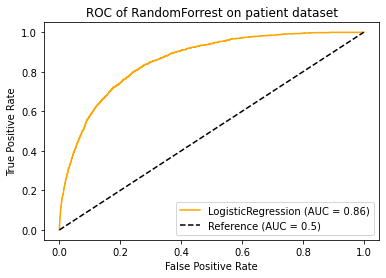

In [11]:
multi.plot_roc(model, test_x, test_y, title="ROC of RandomForrest on patient dataset")

In [12]:
f1 = multi.calc_f1(model, test_x, test_y)
print(f"Weighted F1-score = {f1}")

Weighted F1-score = 0.8250622978776192


In [27]:
pred_y = model.predict(test_x)
print(sklearn.metrics.classification_report(y_true=test_y, y_pred=pred_y))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     16756
           1       0.25      0.76      0.38      1587

    accuracy                           0.78     18343
   macro avg       0.61      0.77      0.62     18343
weighted avg       0.91      0.78      0.83     18343

